## Tomtato leaf disease detection using Inception V3

In [ ]:
import threading
import time

interval = 36000

# Function to keep the session active
def keep_active():
    while True:
        print("Session is active.")
        time.sleep(interval)

# Create a thread for the keep_active function
keep_active_thread = threading.Thread(target=keep_active)

# Start the thread
keep_active_thread.start()


Session is active.


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
1147/1147 [==============================] - 5552s 5s/step - loss: 4.1381 - accuracy: 0.6821 - val_loss: 2.9376 - val_accuracy: 0.7836
Epoch 2/10
1147/1147 [==============================] - 3220s 3s/step - loss: 3.5103 - accuracy: 0.7864 - val_loss: 4.0429 - val_accuracy: 0.7679
Epoch 3/10
1147/1147 [==============================] - 3232s 3s/step - loss: 3.3135 - accuracy: 0.8213 - val_loss: 2.6305 - val_accuracy: 0.8478
Epoch 4/10
1147/1147 [==============================] - 3202s 3s/step - loss: 3.2418 - accuracy: 0.8380 - val_loss: 3.6152 - val_accuracy: 0.8371
Epoch 5/10
1147/1147 [==============================] - 3237s 3s/step - loss: 2.7428 - accuracy: 0.8583 - val_loss: 4.3151 - val_accuracy: 0.8133
Epoch 6/10
1147/1147 [==============================] - 3221s 3s/step - loss: 2.7726 - accuracy: 0.8654 - val_loss: 5.5068 - val_accuracy: 0.7961
Epoch 7/10
1147/1147 [==============================] - 3261s 3s/step - loss: 2.9931 - accuracy: 0.8660 - val_loss: 3.2671 -

In [ ]:
import matplotlib.pyplot as plt

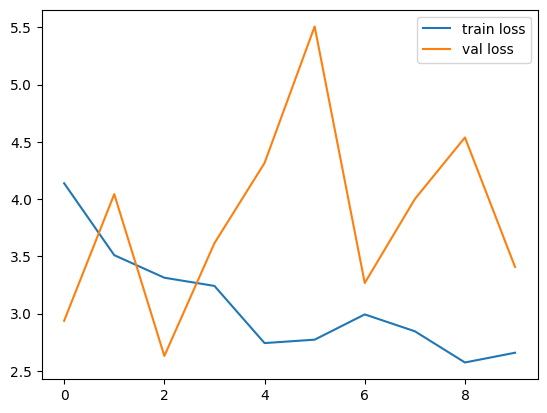

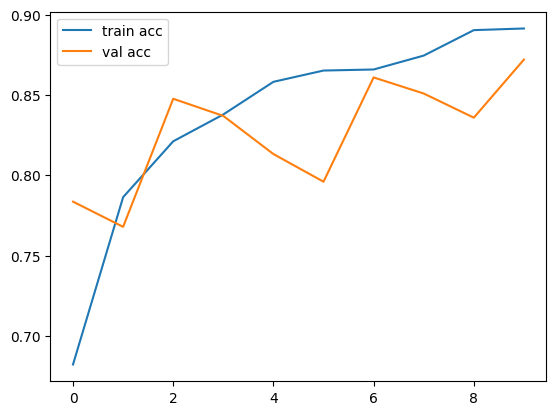

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/SAVED MODELS/tomato_leaf_model.h5')

In [ ]:

y_pred = model.predict(test_set)
y_pred

287/287 [==============================] - 607s 2s/step


array([[9.9999994e-01, 6.5228605e-37, 0.0000000e+00, ..., 2.3955884e-33,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 9.9999994e-01],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        9.9999994e-01, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [2.4354882e-25, 1.5520234e-24, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 3.1647123e-03]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 9, 8, ..., 5, 6, 6])